In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols

Read Property Data as Panda DataFrame

In [3]:
property_df = pd.read_csv('../data/raw/property_w_distance.csv')

Histogram for Features

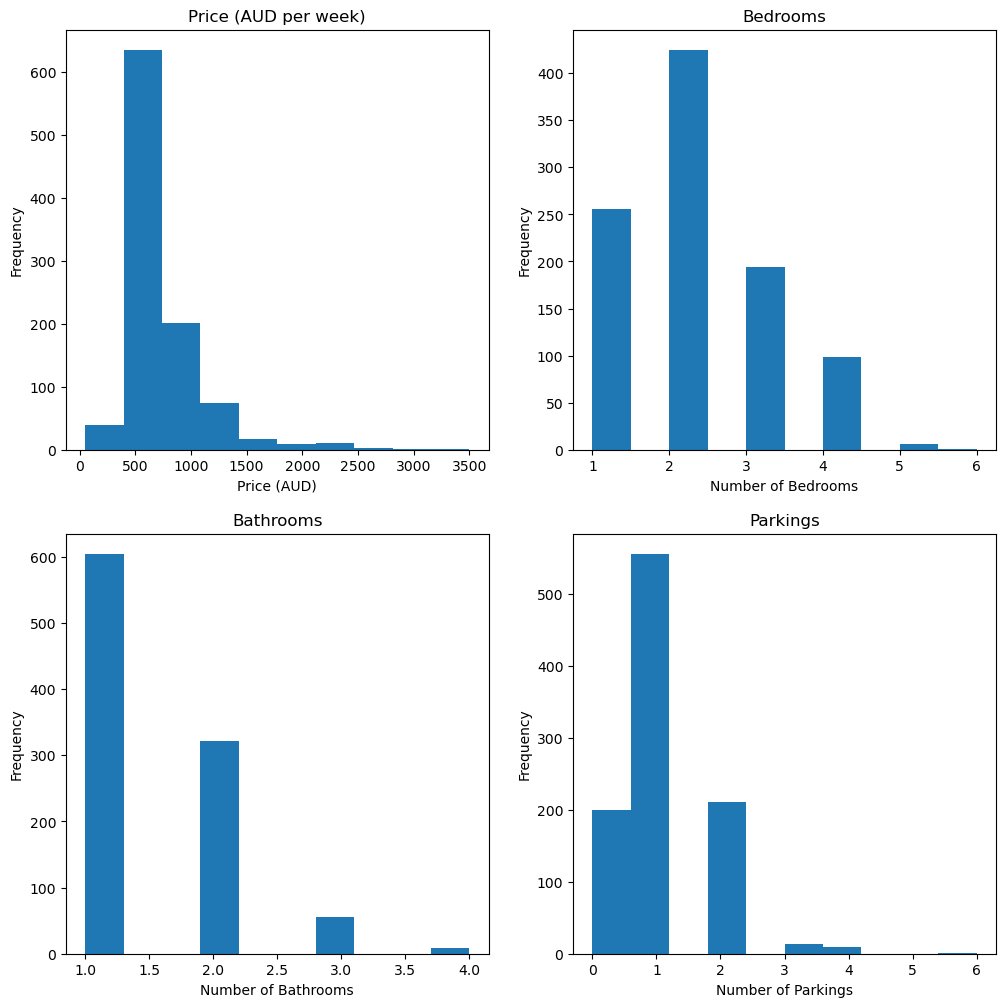

In [37]:
plt.figure(figsize=(12, 12))

# Histogram for price (AUD per week)
plt.subplot(2, 2, 1)
plt.hist(property_df["price (AUD per week)"])
plt.title("Price (AUD per week)")
plt.xlabel("Price (AUD)")
plt.ylabel("Frequency")

# Histogram for bedrooms
plt.subplot(2, 2, 2)
plt.hist(property_df["bedrooms"], bins=10)
plt.title("Bedrooms")
plt.xlabel("Number of Bedrooms")
plt.ylabel("Frequency")

# Histogram for bathrooms
plt.subplot(2, 2, 3)
plt.hist(property_df["bathrooms"], bins=10)
plt.title("Bathrooms")
plt.xlabel("Number of Bathrooms")
plt.ylabel("Frequency")

# Histogram for parkings
plt.subplot(2, 2, 4)
plt.hist(property_df["parkings"], bins=10)
plt.title("Parkings")
plt.xlabel("Number of Parkings")
plt.ylabel("Frequency")

plt.show()

#All four distributions are right skewed

Apply Log Transformation

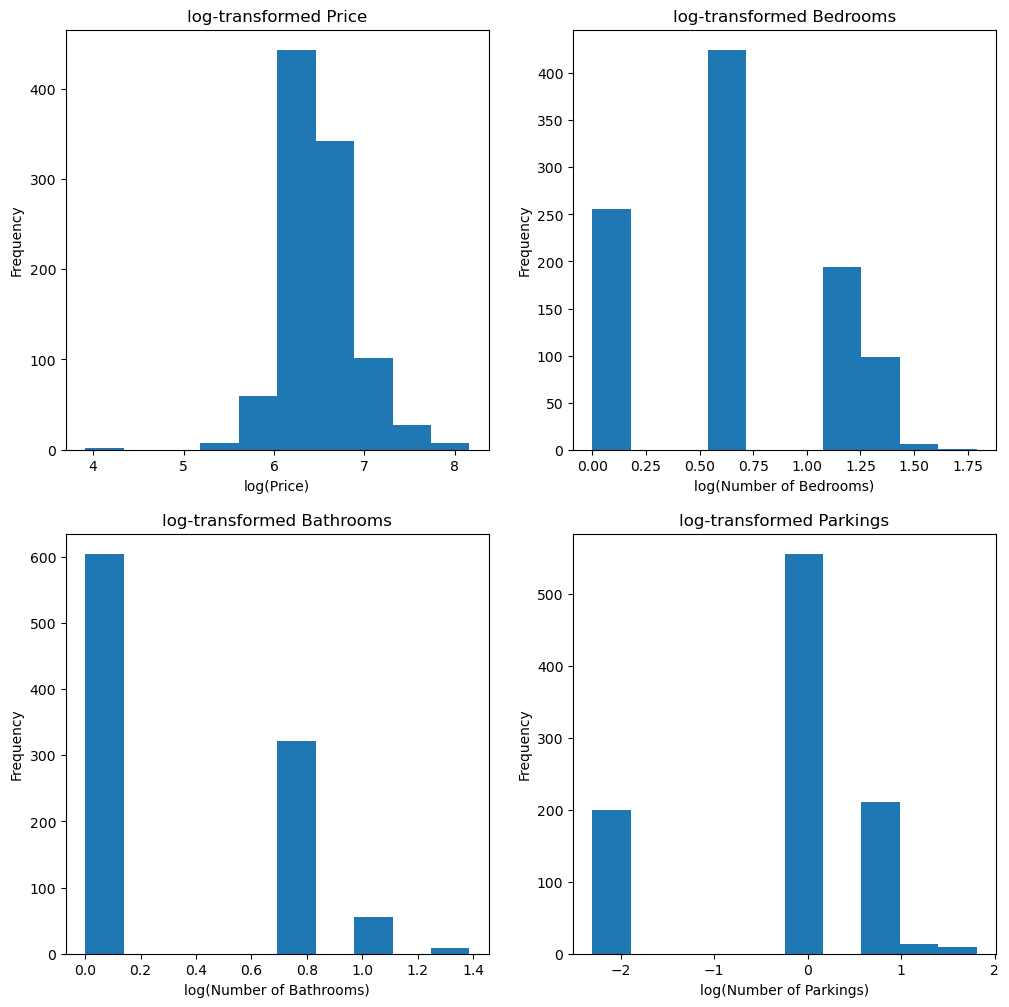

In [38]:
log_price = np.log(property_df["price (AUD per week)"])
log_bedrooms = np.log(property_df["bedrooms"])
log_bathrooms = np.log(property_df["bathrooms"])
log_parkings = np.log(property_df["parkings"]+0.1) #add 0.1 to prevent log(0)

plt.figure(figsize=(12, 12))

# Histogram for log(price)
plt.subplot(2, 2, 1)
plt.hist(log_price)
plt.title("log-transformed Price")
plt.xlabel("log(Price)")
plt.ylabel("Frequency")

# Histogram for log(bedrooms)
plt.subplot(2, 2, 2)
plt.hist(log_bedrooms, bins=10)
plt.title("log-transformed Bedrooms")
plt.xlabel("log(Number of Bedrooms)")
plt.ylabel("Frequency")

# Histogram for log(bathrooms)
plt.subplot(2, 2, 3)
plt.hist(log_bathrooms, bins=10)
plt.title("log-transformed Bathrooms")
plt.xlabel("log(Number of Bathrooms)")
plt.ylabel("Frequency")

# Histogram for log(parkings)
plt.subplot(2, 2, 4)
plt.hist(log_parkings, bins=10)
plt.title("log-transformed Parkings")
plt.xlabel("log(Number of Parkings)")
plt.ylabel("Frequency")

plt.show()

# skewness of distributions improved except for bathrooms

Apply log transformation on min_train_dist which helps to reduce the effect of skewness

In [4]:
property_df['log_min_train_dist'] = np.log1p(property_df['min_train_dist'])

Pearson Corrolation Between Features (only including numerical and ordinal features)

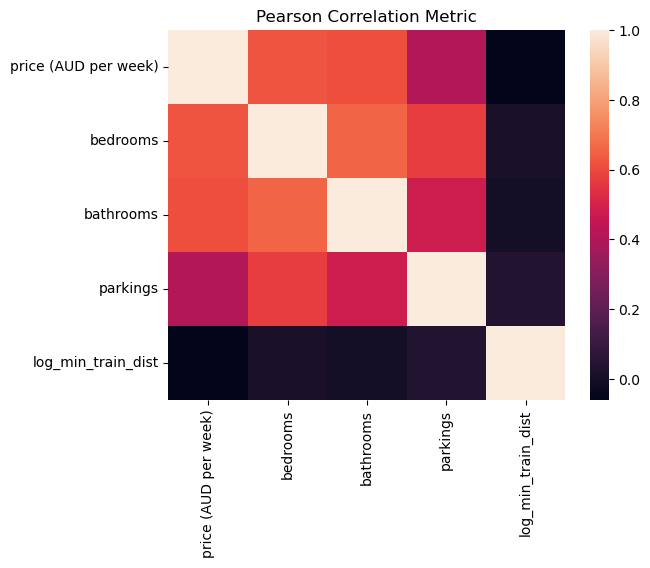

In [12]:
corr_columns = [
    "price (AUD per week)", "bedrooms", "bathrooms", "parkings", "log_min_train_dist"
]

sns.heatmap(property_df[corr_columns].corr())

plt.title('Pearson Correlation Metric')
plt.savefig('../plots/pearson_corr.png', bbox_inches='tight')
plt.show()
# no strong relationship bewteen price and log_min_train_dist

Try Spearman’s correlation for detecting monotonic relationship

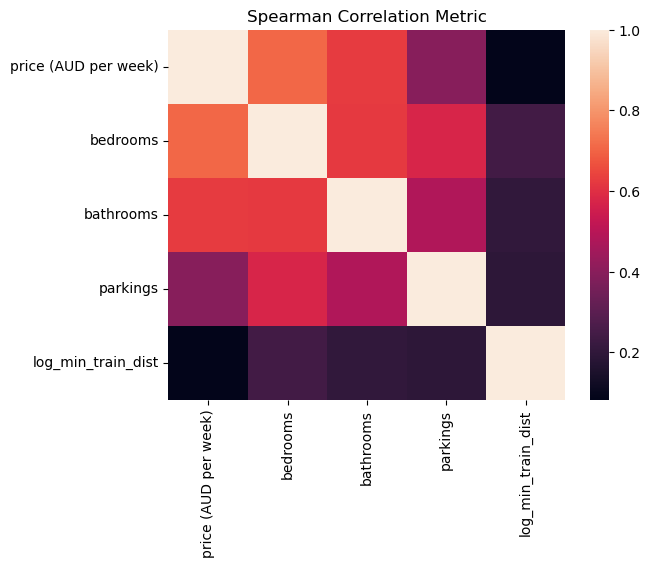

In [13]:
sns.heatmap(property_df[corr_columns].corr(method='spearman'))
plt.title('Spearman Correlation Metric')
plt.savefig('../plots/spearmans_corr.png', bbox_inches='tight')
plt.show()

# still no strong relationship bewteen price and log_min_train_dist

Perform ANOVA tests on categorical variables

In [47]:
# Rename the 'price (AUD per week)' column
property_df = property_df.rename(columns={'price (AUD per week)': 'price_per_week'})
# Rename the 'property type' column
property_df = property_df.rename(columns={'property type': 'property_type'})

In [45]:
# test effect of suburb on rental price
model_suburb = ols('price_per_week ~ C(suburb)', data=property_df).fit()

anova_suburb = sm.stats.anova_lm(model_suburb, typ=2)
print(anova_suburb)

# there is a statistically significant effect of suburb on rental price


                 sum_sq     df         F    PR(>F)
C(suburb)  2.655413e+07  154.0  1.522675  0.000172
Residual   9.455635e+07  835.0       NaN       NaN


In [48]:
# test effect of property type on rental price
model_type = ols('price_per_week ~ C(property_type)', data=property_df).fit()

anova_type = sm.stats.anova_lm(model_type, typ=2)
print(anova_type)

# there is a statistically significant effect of property type on rental price


                        sum_sq     df          F        PR(>F)
C(property_type)  2.272823e+07    6.0  37.848711  1.878596e-41
Residual          9.838225e+07  983.0        NaN           NaN
